In [7]:
import numpy as np
import pandas as pd
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
Batch_size=32
epoch=35

In [12]:

tf_data=tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/indian-currency-notes-classifier/Train",
    image_size=(256,256),
    shuffle=True,
    batch_size=Batch_size
)

Found 153 files belonging to 7 classes.


In [13]:
cls=tf_data.class_names
cls

['1Hundrednote',
 '2Hundrednote',
 '2Thousandnote',
 '5Hundrednote',
 'Fiftynote',
 'Tennote',
 'Twentynote']

In [14]:
def get_vector(labe):
    return tf.one_hot(labe,7)

In [15]:
tf_date=tf_data.map(lambda img, label: (img,get_vector(label))).map(lambda k,l:(k/255,l))

In [16]:
len(tf_date)

5

In [17]:
tf_dat=tf_date.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [20]:
tf_test=tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/indian-currency-notes-classifier/Test",
    image_size=(256,256),
    shuffle=True,
    batch_size=Batch_size,
    label_mode='categorical'
)

Found 42 files belonging to 7 classes.


In [21]:
tf_test1=tf_test.map(lambda cv,vb:(cv/255,vb)).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

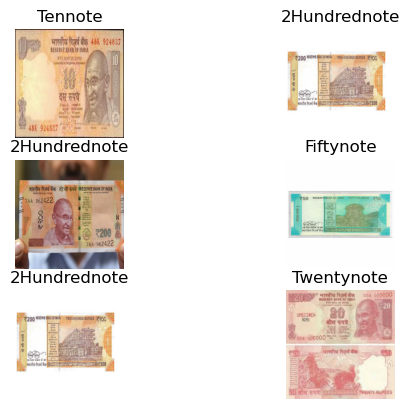

In [22]:
for img,bn in tf_data.take(1):
    for i in range(6):
        ax=plt.subplot(3,2,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(cls[bn[i]])
        plt.axis("off")

In [23]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(256,
                                                              256,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [146]:
model=tf.keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=82,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=62,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(65,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7,activation="softmax"),
])

In [147]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [148]:
r=model.fit(tf_dat,validation_data=tf_test1,validation_steps=len(tf_test1),epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 98ms/step - loss: 2.1393 - accuracy: 0.1634 - val_loss: 1.9435 - val_accuracy: 0.1429
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 1.9692 - accuracy: 0.1046 - val_loss: 1.9444 - val_accuracy: 0.1190
Epoch 3/100
5/5 [==============================] - 0s 60ms/step - loss: 1.9438 - accuracy: 0.1895 - val_loss: 1.9392 - val_accuracy: 0.2381
Epoch 4/100
5/5 [==============================] - 0s 60ms/step - loss: 1.9458 - accuracy: 0.1242 - val_loss: 1.9447 - val_accuracy: 0.1429
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 1.9424 - accuracy: 0.1373 - val_loss: 1.9473 - val_accuracy: 0.1190
Epoch 6/100
5/5 [==============================] - 0s 63ms/step - loss: 1.9270 - accuracy: 0.1699 - val_loss: 1.9461 - val_accuracy: 0.1190
Epoch 7/100
5/5 [==============================] - 0s 60ms/step - loss: 1.9230 - accuracy: 0.1569 - val_loss: 1.9555 - val_accuracy: 0.1905
Epoch 8/100
5/5 [===

Text(0.5, 1.0, 'TRAINING AND VALIDATION LOSS')

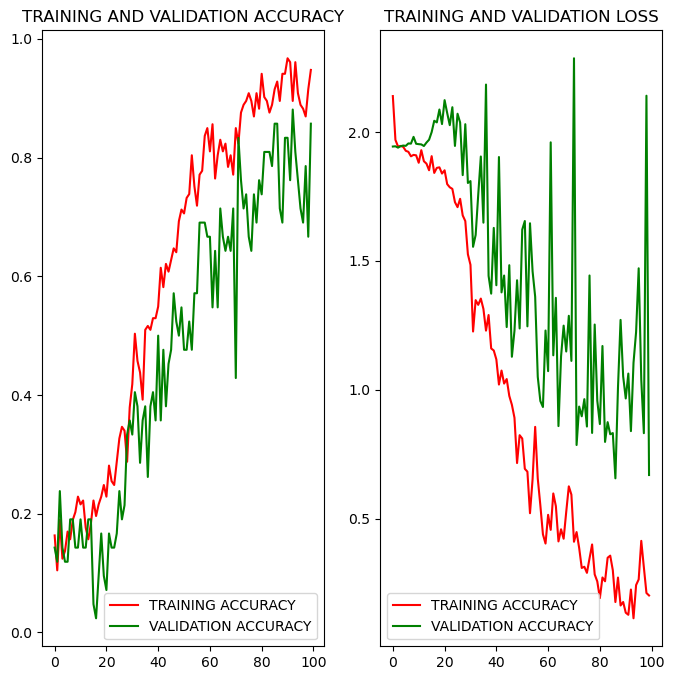

In [149]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(100),r.history["accuracy"],color="red",label="TRAINING ACCURACY")
plt.plot(range(100),r.history["val_accuracy"],color="green",label="VALIDATION ACCURACY")
plt.legend()
plt.title("TRAINING AND VALIDATION ACCURACY")
plt.subplot(1,2,2)
plt.plot(range(100),r.history["loss"],color="red",label="TRAINING ACCURACY")
plt.plot(range(100),r.history["val_loss"],color="green",label="VALIDATION ACCURACY")
plt.legend()
plt.title("TRAINING AND VALIDATION LOSS")

In [150]:
model.evaluate(tf_test1)

2/2 [==============================] - 0s 22ms/step - loss: 0.6689 - accuracy: 0.8571


[0.6688873767852783, 0.8571428656578064]

In [151]:
import cv2
import numpy as np

In [152]:
photo="/kaggle/input/sample/indias-new-100-note-will-be-relatively-more-expensive-to-introduce-than-the-others.webp"
sd=pathlib.Path(photo)
num=cv2.imread(str(sd))
num=cv2.resize(num,(256,256))
num=num/255
num = num.astype(np.uint8)
num_rgb = cv2.cvtColor(num, cv2.COLOR_BGR2RGB)
num_rgb = np.expand_dims(num_rgb, axis=0)


In [153]:
dj=tf.data.Dataset.from_tensors(num_rgb)

In [154]:
v=model.predict(dj)

1/1 [==============================] - 0s 75ms/step


In [155]:
final=np.argmax(v)

In [156]:
v

array([[4.5429502e-08, 3.4579276e-08, 1.2897687e-05, 9.9998701e-01,
        1.0223763e-11, 1.1217310e-10, 1.0994186e-09]], dtype=float32)

In [157]:
cls[final]

'5Hundrednote'

In [121]:
model.save("MY_Currency_CNN")

In [25]:
import shutil
output_name = 'MY_currency'

shutil.make_archive(f'/kaggle/working/{output_name}', 'zip', "/kaggle/working/MY_Currency_CNN")


'/kaggle/working/MY_currency.zip'

In [26]:
import json

with open("lablesCur.json","w") as bani:
    bani.write(json.dumps(cls))